# PROBLEM STATEMENT :

## Every job advertisement receives a significant number of applications, many of which are related to the listed position. Because they must identify the most qualified profile/resume from a broad pool of prospects, job recruiters encounter substantial challenges. 

## So the recruiters must be able to thoroughly examine resumes in order to hire the right person at the right time. Every great recruitment strategy revolves around the requirement for efficient and effective resume screening

In [2]:
import numpy as np
import pandas as pd

### Reading the dataset

In [3]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [4]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.shape

(962, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [6]:
# checking if there any missing values

df.isnull().sum()

Category    0
Resume      0
dtype: int64

## Exploratory data Analysis (EDA)

#### Displaying the distinct categories of resume :

In [7]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

#### Displaying the distinct categories of resume and the number of records belonging to each category :

In [8]:
category = df['Category'].value_counts().reset_index()
category

,index,Category
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Blockchain,40
8,ETL Developer,40
9,Operations Manager,40


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Distribution of job categories in count

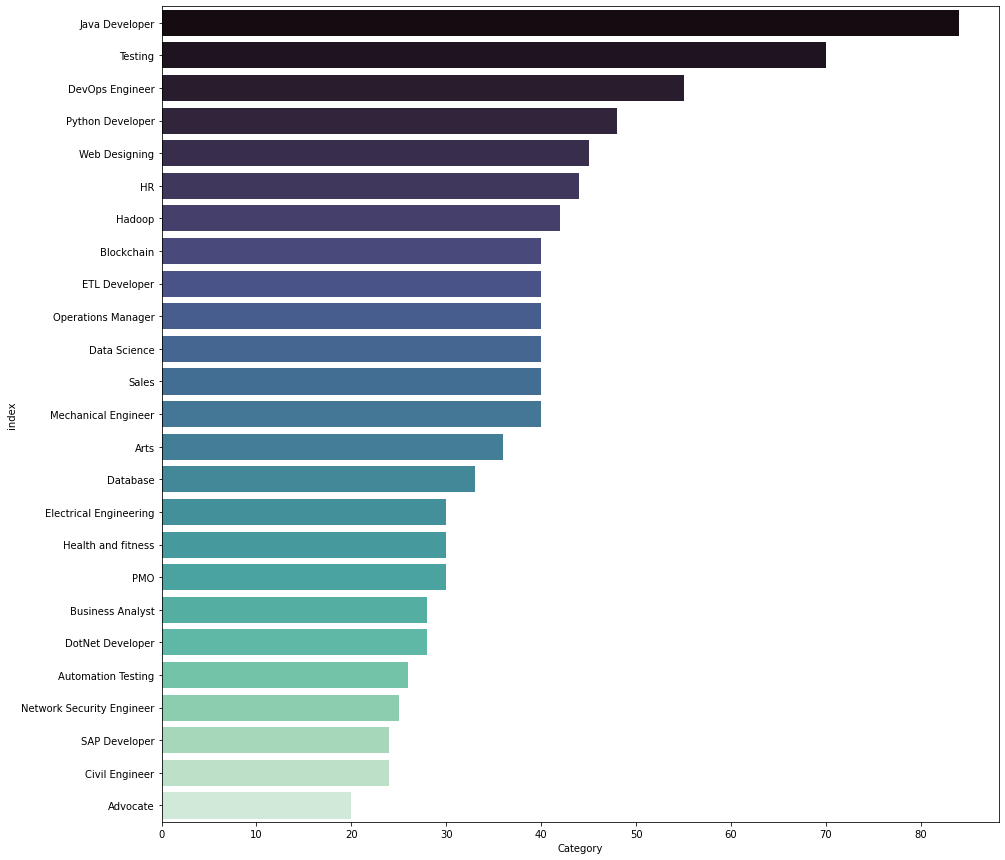

In [10]:
plt.figure(figsize=(15,15))
sns.barplot(x=category['Category'], y=category['index'], palette='mako')
plt.show()

#### distribution of job categories in percentage

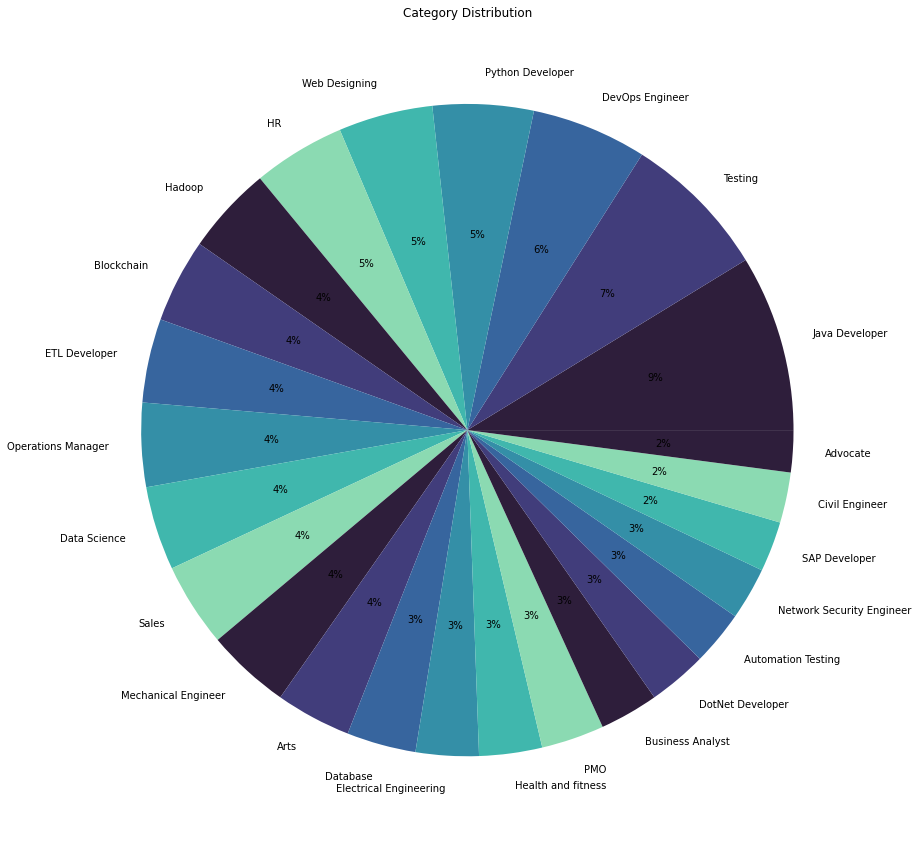

In [11]:
plt.figure(figsize=(15,15))
plt.pie(category['Category'], labels=category['index'],
        colors=sns.color_palette('mako'), autopct='%.0f%%')
plt.title('Category Distribution')
plt.show()

## Data pre-processing

#### Removing unnecessary information from 'Resume' column like URLs, hashtags, and special characters.

In [5]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [12]:
import re

def cleanResume(df):
    df = re.sub('http\S+\s*', ' ', df)  # remove URLs
    df = re.sub('RT|cc', ' ', df)  # remove RT and cc
    df = re.sub('#\S+', '', df)  # remove hashtags
    df = re.sub('@\S+', '  ', df)  # remove mentions
    df = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', df)  # remove punctuations
    df = re.sub(r'[^\x00-\x7f]',r' ', df) 
    df = re.sub('\s+', ' ', df)  # remove extra whitespace
    return df

In [13]:
df['cleaned'] = df['Resume'].apply(lambda x:cleanResume(x))
df.head()

,Category,Resume,cleaned
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [14]:
#getting the entire resume text
corpus=" "
for i in range(0,len(df)):
    corpus= corpus+ df["cleaned"][i]

In [15]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Tokenizing the text

In [16]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(corpus)
len(tokens)

411913

#### Converting all characters to lowercase

In [17]:
words = []
for word in tokens:
    words.append(word.lower())
words[0:5]

['skills', 'programming', 'languages', 'python', 'pandas']

### Encoding the data

In [18]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df['new_Category'] = label.fit_transform(df['Category'])
df.head()

,Category,Resume,cleaned,new_Category
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...,6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...,6


#### Vectorizing the cleaned columns

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

text = df['cleaned'].values
target = df['new_Category'].values
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(text)
WordFeatures = word_vectorizer.transform(text)

WordFeatures.shape

(962, 1500)

## Data modelling

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, target, random_state=24, test_size=0.2)

In [22]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [23]:
model = OneVsRestClassifier(KNeighborsClassifier())
model.fit(X_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [24]:
y_pred = model.predict(X_test)

### Prediction

In [25]:
print(f' Training Accuracy   :- {(model.score(X_train, y_train)*100).round(2)}% ')
print(f' Validation Accuracy :- {(model.score(X_test, y_test)*100).round(2)}% ')

 Training Accuracy   :- 98.96% 
 Validation Accuracy :- 96.89% 


In [26]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00        16
          16       1.00      1.00      1.00         7
          17       1.00    

### Learning the top keywords across resumes

#### Removing the stopwords

In [27]:
stopwords = nltk.corpus.stopwords.words('english')
words_new = []
for word in words:
    if word not in stopwords:
        words_new.append(word)
words_new[0:5]

['skills', 'programming', 'languages', 'python', 'pandas']

In [28]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

#### Performing lemmatization

In [29]:
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
wn = WordNetLemmatizer() 
lem_words=[]
for word in words_new:
    word=wn.lemmatize(word)
    lem_words.append(word)
lem_words[0:5]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['skill', 'programming', 'language', 'python', 'panda']

In [30]:
same=0
diff=0
for i in range(0,1832):
    if(lem_words[i]==words_new[i]):
        same=same+1
    elif(lem_words[i]!=words_new[i]):
        diff=diff+1
print('Number of words Lemmatized=', diff)
print('Number of words not Lemmatized=', same)

Number of words Lemmatized= 294
Number of words not Lemmatized= 1538


#### Frequency distribution of words

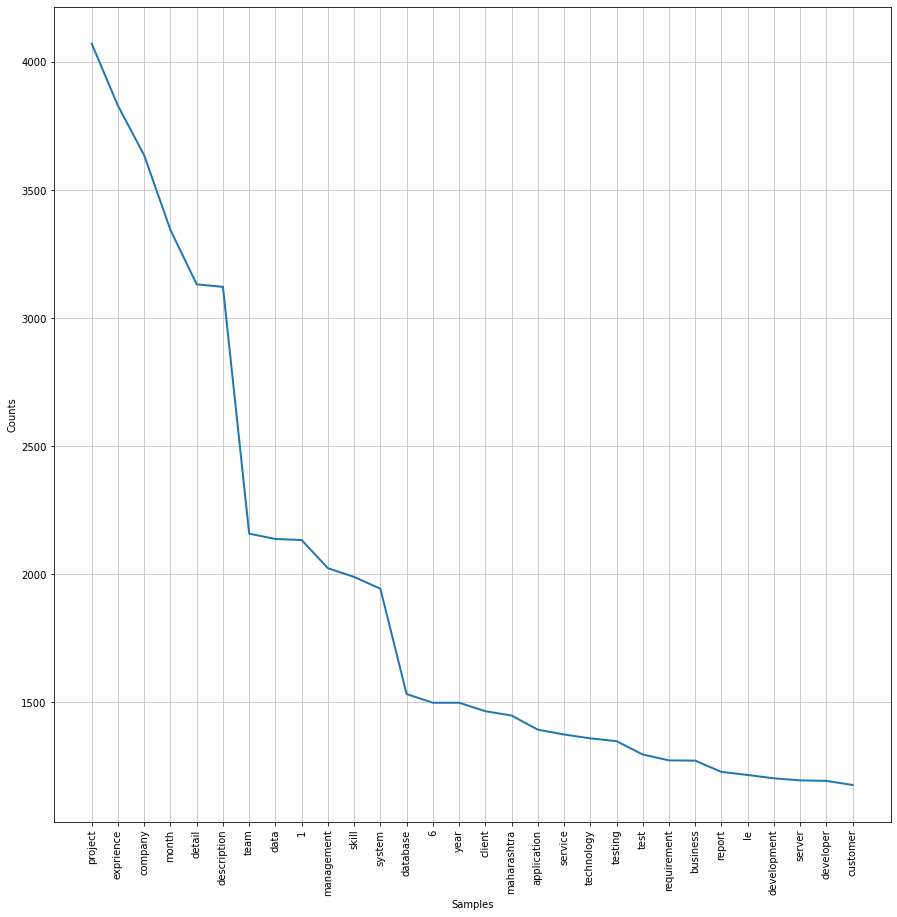

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [31]:
freq_dist = nltk.FreqDist(lem_words)
plt.subplots(figsize=(15,15))
freq_dist.plot(30)

### Wordcloud

In [32]:
res=' '.join([i for i in lem_words if not i.isdigit()])

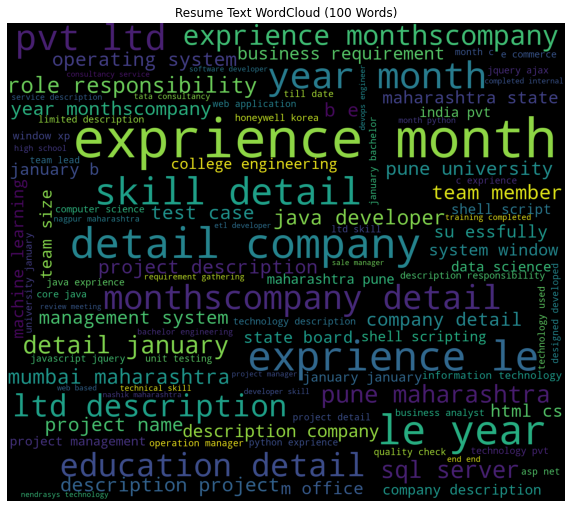

In [33]:
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(max_words=100,width=1400,height=1200).generate(res)
plt.imshow(wordcloud)
plt.title('Resume Text WordCloud (100 Words)')
plt.axis('off')
plt.show()

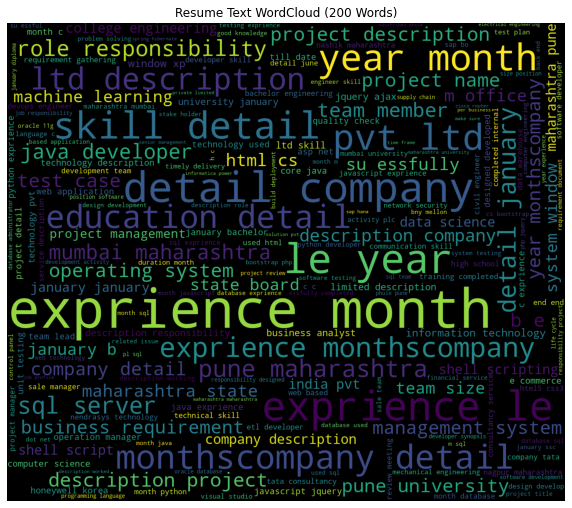

In [34]:
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(max_words=200,width=1400,height=1200).generate(res)
plt.imshow(wordcloud)
plt.title('Resume Text WordCloud (200 Words)')
plt.axis('off')
plt.show()